In [73]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [74]:
sys.path.append('../')
from src.mechanism.all_pay import AllPay
from src.game import Game
from src.strategy import Strategy
from src.learner import SODA

In [284]:
# parameter mechanism
bidder = ['1', '1']
o_space = {i:[0.0, 1.0] for i in bidder}
a_space = {i:[0.0, 0.6] for i in bidder}
param_prior = {'distribution':'gaussian_bimodal'}

util_setting = 'first_price'
param_util = {'type':'valuation', 'tiebreaking': 'lose'}

# parameter approximation game
n = m = 128

# parameter learner
max_iter = int(5e3)
tol = 1e-5
steprule_bool = True
eta = 10
beta = 1/20

In [285]:
# create mechanism
mechanism = AllPay(bidder, o_space, a_space, param_prior, util_setting, param_util)

In [286]:
# create approximation game
game = Game(mechanism, n, m)
game.get_utility(mechanism)

In [322]:
# create learner
soda = SODA(max_iter, tol, steprule_bool, eta, beta)

# create and initialize strategies
strategies = {}
for i in game.set_bidder:
    strategies[i] = Strategy(i, game)
    strategies[i].initialize('truthful')

In [323]:
# run soda
soda.run(mechanism, game, strategies)

100%|████████████████████| 5.00k/5.00k [00:17<00:00, 288it/s]                                                                                                                                                     

No convergence
Current relative utility loss 0.005 %
Best relative utility loss 0.005 %


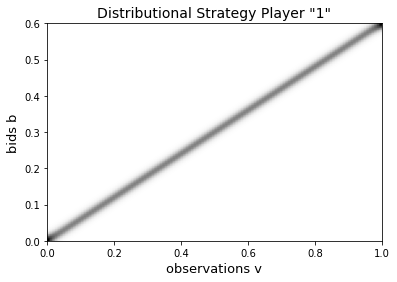

In [327]:
x = np.linspace(o_space['1'][0],o_space['1'][1],100)
strategies['1'].plot(False,None)

In [325]:
strategies['1'].initialize('truthful')
grad = soda.compute_gradient(strategies, game, '1')

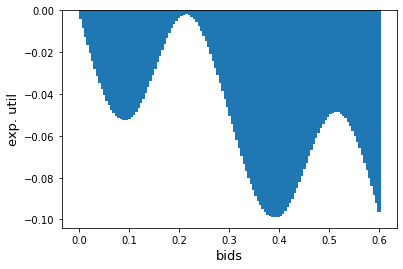

In [326]:
plt.bar(strategies['1'].a_discr,grad[64], width=1/m)
plt.xlabel('bids', fontsize=13)
plt.ylabel('exp. util', fontsize=13)
plt.show()

In [110]:
strategies['1'].utility[-1]

0.14734880859079438

### What about mixed strategies

In [236]:
strategies['1'].x = np.array(strategies['1'].history[7:]).mean(axis=0)
grad = soda.compute_gradient(strategies, game, '1')
br = strategies['1'].best_response(grad)
print('relative utility loss', round((1 - (grad * strategies['1'].x).sum()/(grad * br).sum())*100,2),'%')

relative utility loss 0.03 %


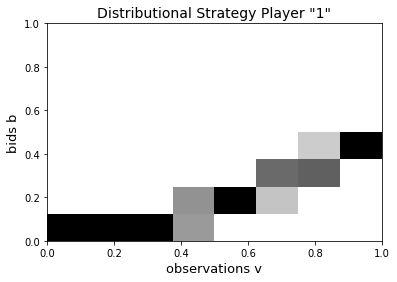

In [237]:
strategies['1'].plot(False, )

In [ ]:
plt.bar(strategies['1'].a_discr, soda.grad['1'][50], width=0.02)
plt.ylabel('exp. utility')
plt.xlabel('bids')
plt.show()

In [ ]:
strategies['1'].o_discr[50]

In [ ]:
%matplotlib notebook

In [ ]:
fig, ax = plt.subplots()

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(0, 500,10):
    im = ax.imshow(strategies['1'].history[i].T, animated=True,  origin="lower", cmap="Greys",)
    if i == 0:
        ax.imshow(strategies['1'].history[i].T,  origin="lower", cmap="Greys",)  # show an initial one first
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=500, blit=True, repeat=False)

### Expected Utility

In [ ]:
val_idx = 30
for t in range(0, 200, 5):
    strategies['1'].x = strategies['1'].history[t]
    grad = soda.compute_gradient(strategies, game, '1')[val_idx]
    plt.axvline(x = np.argmax(grad))
    plt.plot(range(m), grad)
plt.show()

In [ ]:
grad

In [ ]:
game.utility['1'][0,0,0]

In [ ]:
plt.figure(figsize=(12,8))
for k in np.arange(0,n,5):
    grad = soda.compute_gradient(strategies, game, '1')[k]
    plt.plot(range(n), grad, label = 'val='+str(round(strategies['1'].o_discr[k],2)))
    plt.scatter(np.argmax(grad),grad[np.argmax(grad)])
plt.legend()
#plt.ylim(-0.25, 0.25)
plt.grid(alpha=.2)
plt.show()